In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix





## Reading the Dataset and seeing datapoints

In [ ]:
# url = "https://raw.githubusercontent.com/Ainzzzzzzz/X/main/Car-Evaluation.csv"
# car_df = pd.read_csv(url)
car_df= pd.read_csv('/content/Car-Evaluation.csv')
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class_labels
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,med,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
car_df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'class_labels'],
      dtype='object')

In [ ]:
#Checking Initial Dimension
print(car_df.shape)
car_df.describe()

(2034, 7)


,buying,maint,doors,persons,lug_boot,safety,class_labels
count,2028,2021,2027,2028,2030,2029,2032
unique,4,4,4,3,3,3,4
top,med,vhigh,3,4,med,low,unacc
freq,622,550,526,684,678,679,1419


In [ ]:
car_df['class_labels'].value_counts()

unacc    1419
acc       456
good       84
vgood      73
Name: class_labels, dtype: int64

In [ ]:
#printing unique values of the columns
print(car_df["buying"].unique())
print(car_df["maint"].unique())
print(car_df["doors"].unique())
print(car_df["persons"].unique())
print(car_df["lug_boot"].unique())
print(car_df["safety"].unique())
print(car_df["class_labels"].unique())

['vhigh' 'high' nan 'med' 'low']
['vhigh' 'high' 'med' 'low' nan]
['2' '3' '4' '5more' nan]
['2' '4' 'more' nan]
['small' 'med' 'big' nan]
['low' 'med' 'high' nan]
['unacc' 'acc' 'vgood' 'good' nan]


In [ ]:
#Changing values to nan
condition = car_df['buying'] == 'low'
condition = car_df['safety'] == 'low'
car_df.loc[condition,['buying','safety']] = np.nan

In [ ]:
#checking how many nan values in total
car_df.isnull().sum()

buying          683
maint            13
doors             7
persons           6
lug_boot          4
safety          684
class_labels      2
dtype: int64

In [ ]:
#drop
car_df=car_df.dropna(axis=0,subset=['buying','maint','doors','persons','lug_boot','safety','class_labels'])
car_df.shape

(1328, 7)

In [ ]:
car_df.isnull().sum()

buying          0
maint           0
doors           0
persons         0
lug_boot        0
safety          0
class_labels    0
dtype: int64

In [ ]:
car_df["doors"]= car_df["doors"].replace({"2":"two", "3":"three","4":"four","5more":"five or more"})
car_df["persons"]= car_df["persons"].replace({"2":"two", "4":"four","more":"more"})

In [ ]:
#Encoding
car_df["buying"] = car_df["buying"].map({"vhigh": 2,"high":3,"med": 1})
car_df["maint"] = car_df["maint"].map({"low": 0, "med": 1, "high": 2,"vhigh":3})
car_df["doors"] = car_df["doors"].map({"two":2,"three":3, "four": 4,"five or more": 0})
car_df["persons"] = car_df["persons"].map({"two": 2, "four": 4, "more": 5 })
car_df["lug_boot"] = car_df["lug_boot"].map({"med": 1, "small": 0, "big": 2})
car_df["safety"] = car_df["safety"].map({"high": 2,"med":1})
car_df["class_labels"] = car_df["class_labels"].map({"vgood": 4, "good": 3, "acc": 2, "unacc":0})

# Exploring the dataset's rows and columns

In [ ]:
car_df.head(15)

,buying,maint,doors,persons,lug_boot,safety,class_labels
1,2.0,3,2,2,0,1,0
2,2.0,3,2,2,1,2,0
4,2.0,3,2,2,1,1,0
5,2.0,3,2,2,1,2,0
7,2.0,3,2,2,2,1,0
8,2.0,3,2,2,2,2,0
10,2.0,3,2,4,0,1,0
11,2.0,3,2,4,0,2,0
13,2.0,3,2,4,1,1,0
14,2.0,3,2,4,1,2,0


#Feature Scalling


In [ ]:
# Selecting specific columns as featuresP
features = car_df[['buying', 'maint','doors','persons','lug_boot','safety','class_labels']]

# Perform one-hot encoding on the categorical columns
features_encoded = pd.get_dummies(features)

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_scaled_minmax = min_max_scaler.fit_transform(features_encoded)

# Standardization
standard_scaler = StandardScaler()
data_scaled_standard = standard_scaler.fit_transform(features_encoded)

In [ ]:
# Calculating Frequencies to Determine Data Balance
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
for col in columns:
  print (car_df[col].value_counts(), end= '\n\n')

1.0    406
2.0    319
3.0    286
Name: buying, dtype: int64

3    363
2    362
1    305
0    298
Name: maint, dtype: int64

3    344
2    331
0    329
4    324
Name: doors, dtype: int64

4    448
5    445
2    435
Name: persons, dtype: int64

1    447
0    442
2    439
Name: lug_boot, dtype: int64

2    669
1    659
Name: safety, dtype: int64



In [ ]:
# checking balance in target
car_df['class_labels'].value_counts()

0    730
2    449
3     77
4     72
Name: class_labels, dtype: int64

# Data visualization

<function matplotlib.pyplot.show(close=None, block=None)>

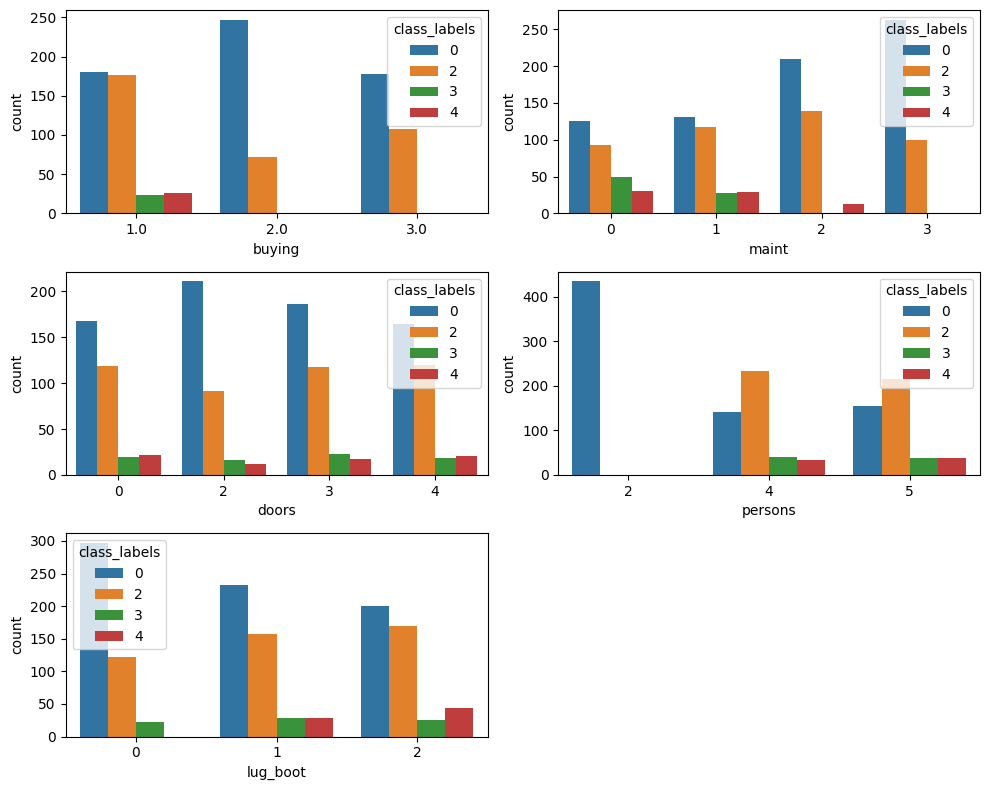

In [ ]:
plt.figure (figsize = (10,8))
for i,col in enumerate (columns[:-1]):
  plt.subplot( 3,2, i+1)
  sns.countplot(car_df, x = col, hue= 'class_labels')

plt.tight_layout()
plt.show

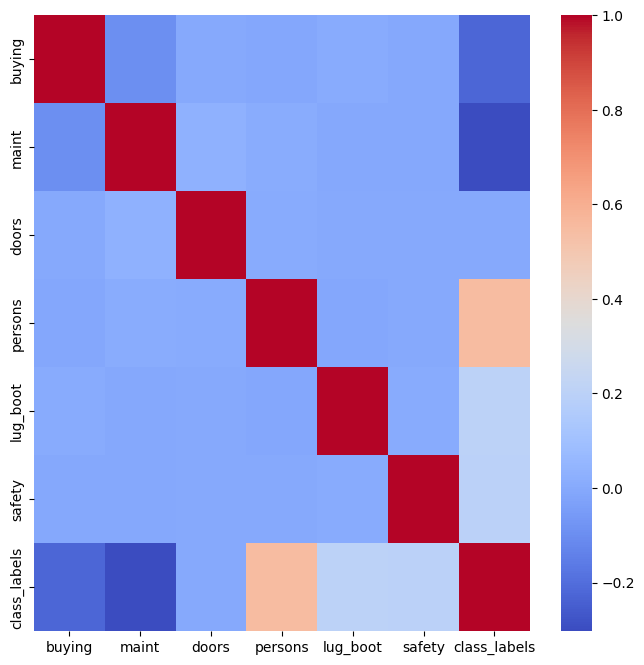

In [ ]:
import seaborn as sns
correlation=car_df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(correlation,cmap='coolwarm')
plt.show()

#Data Splitting


In [ ]:
X = car_df.iloc[:,:-1]
Y = car_df.iloc[:,-1]

In [ ]:
Y.isnull().sum()
X.isnull().sum()

buying      317
maint         0
doors         0
persons       0
lug_boot      0
safety        0
dtype: int64

In [ ]:
car_df.dropna(subset=['buying'], inplace=True)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(car_df[["buying","maint","doors","persons","lug_boot","safety"]],
                                                    car_df["class_labels"],
                                                    test_size = 0.20,
                                                    random_state = 1)

#SVM


In [ ]:
svm_model = SVC()
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_test)

count=0
for i in range(len(Y_test)):
  if list(svm_pred)[i]!= list(Y_test)[i]:
    count =count+1
svm_error= count/len(list(svm_pred))
print(f"SVM Error: {svm_error:.2f}")

svm_accuracy = accuracy_score(Y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

SVM Error: 0.16
SVM Accuracy: 0.84


#KNN


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_train, Y_train)
knn_pred = knn_model.predict(X_test)

count=0
for i in range(len(Y_test)):
  if list(knn_pred)[i]!= list(Y_test)[i]:
    count =count+1
knn_error= count/len(list(svm_pred))
print(f"KNN Error: {knn_error:.2f}")

knn_accuracy = accuracy_score(Y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy:.2f}")

KNN Error: 0.06
KNN Accuracy: 0.94


#Multi-Layer Perception


In [ ]:
mlp_model = MLPClassifier(max_iter=20000)
mlp_model.fit(X_train, Y_train)
mlp_pred = mlp_model.predict(X_test)

count=0
for i in range(len(Y_test)):
  if list(mlp_pred)[i]!= list(Y_test)[i]:
    count =count+1
mlp_error= count/len(list(mlp_pred))
print(f"Multi-Layer perception Error: {mlp_error:.2f}")

mlp_accuracy = accuracy_score(Y_test, mlp_pred)
print(f"Multi-Layer perception Accuracy: {mlp_accuracy:.2f}")

Multi-Layer perception Error: 0.11
Multi-Layer perception Accuracy: 0.89


#Decision Tree


In [ ]:
dt_model = DecisionTreeClassifier(random_state=45)
dt_model.fit(X_train, Y_train)
dt_pred = dt_model.predict(X_test)

count=0
for i in range(len(Y_test)):
  if list(dt_pred)[i]!= list(Y_test)[i]:
    count =count+1
dt_error= count/len(list(dt_pred))
print(f"Decision Tree Error: {dt_error:.2f}")

dt_accuracy = accuracy_score(Y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

Decision Tree Error: 0.02
Decision Tree Accuracy: 0.98


#Comparison Analysis


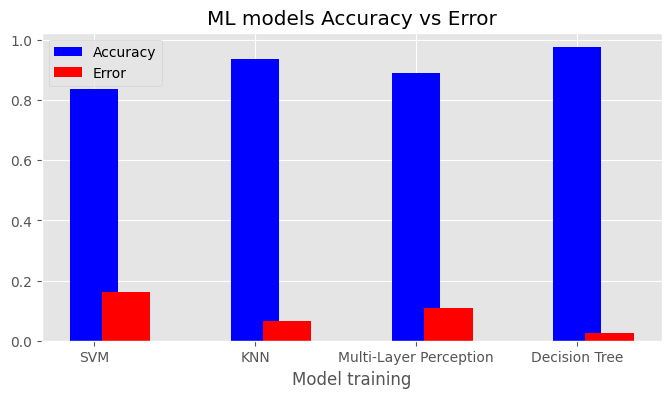

In [ ]:
models = ['SVM', 'KNN',  'Multi-Layer Perception','Decision Tree']
accuracies = (svm_accuracy, knn_accuracy, mlp_accuracy,dt_accuracy)
errors = (svm_error,knn_error, mlp_error, dt_error)
models_pos = np.arange(len(models))
style.use('ggplot')
plt.figure(figsize=(8,4))
barWidth = 0.3
plt.bar(models_pos, accuracies, color='blue', width = barWidth, label='Accuracy')
plt.bar(models_pos+0.2, errors, color='red', width = barWidth, label='Error')
plt.xlabel('Model training')
plt.title('ML models Accuracy vs Error')
plt.xticks(models_pos, models)
plt.legend()

#Confusion Matrix


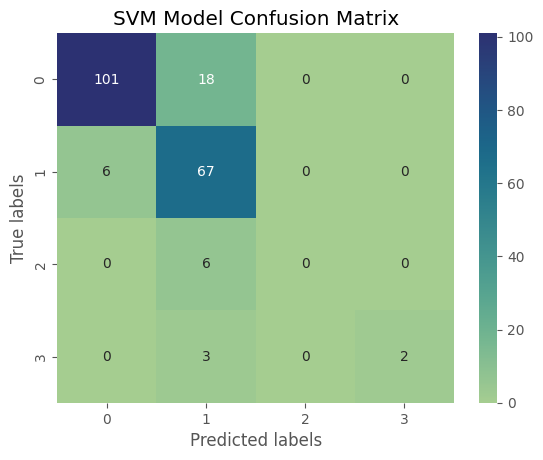

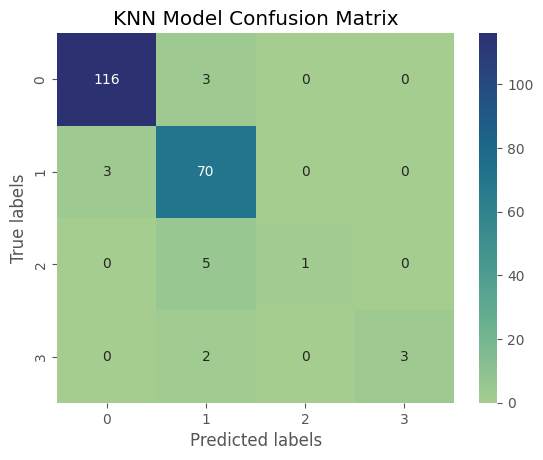

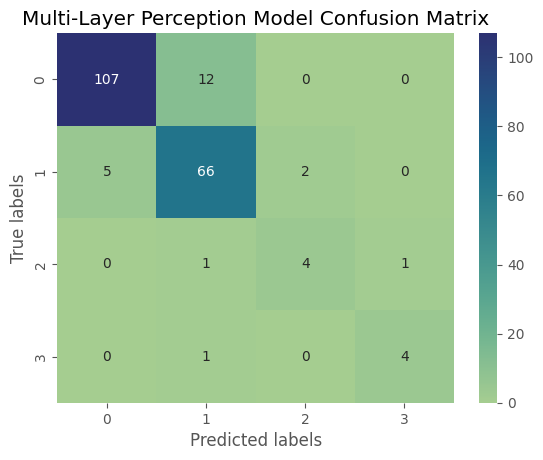

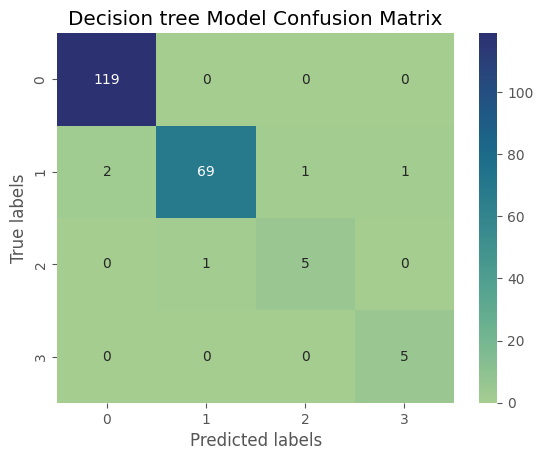

In [ ]:
names=["SVM Model","KNN Model","Multi-Layer Perception Model","Decision tree Model"]
models = ['SVM', 'KNN',  'Multi-Layer Perception', 'Decision Tree']
y_pred=(svm_pred,knn_pred,mlp_pred,dt_pred)
for name,y_pred_model in zip(names,y_pred):
    cm = confusion_matrix(Y_test, y_pred_model)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='crest', fmt='g')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(name + ' Confusion Matrix')
    plt.show()